
# Behaviourial-Cloning 
## End to End learning for self driving cars

### Overview 
In this project, Convolution Neural Networks is used to clone driving behaviour. The model outputs the steering angle to be used by the autonomous vehicle. 

### Goal 
The end goal is to build a machine learning model that can steer a car around a track without any human intervention. The model should ideally work on any test track and can start at any given location. We also want to avoid writing a lot of code to keep everything simple. Our model should take in images of what the car sees and output the correct steering angle (and maybe even the throttle).

By utilizing deep learning, we should also be able to avoid manual feature engineering in the code. It also has a lot of edge-cases where features are computed incorrectly or additional features are required.

The goals of this project is to train network to calculate the steering angle required for lane keeping from front camera image while obeying the following conditions in the model
- Use only Winograd Convolutions
- Use skip connection
- Use  only 2  dense connections.

 
### Approach
The approach is to understand and start with the model as per the nvidia paper and make changes to satisfy the goals of this  project.
##### Library:
Model will be built and coded in Python using Keras framework. Keras uses TensorFlow as  the backend.
##### Network:

*Nvidia original architecture*
[Nvidia paper](https://arxiv.org/pdf/1604.07316.pdf)
![Nvidia's architecture](https://raw.githubusercontent.com/sohonisaurabh/xt-summit/master/resources/nvidia-architecture.png)

*Our architecture*
- Whereas aim of our model is to replace the above convolutions with winograd. i.e to replace 3x3 with combination of 3x1 and 1x3 convolutions, to replace 5x5 with combination of 5x1 and 1x5 convolutions and so on. 
- Also to use skip connections wherever necessary 
- Limit the usage of dense connection to only two.





### Training process

#### Data generation
**Hardware**

![Hardware design of data generation](https://camo.githubusercontent.com/4c5a372b40f1e1cf1f17b4ccd88ff22fd9a3b12b/68747470733a2f2f646576626c6f67732e6e76696469612e636f6d2f706172616c6c656c666f72616c6c2f77702d636f6e74656e742f75706c6f6164732f323031362f30382f646174612d636f6c6c656374696f6e2d73797374656d2e706e67)

**Software**

![Software Design (supervised learning!)](https://camo.githubusercontent.com/aa16e5111df7ff6c5f66fbcdf48ab355a85e70ba/68747470733a2f2f646576626c6f67732e6e76696469612e636f6d2f706172616c6c656c666f72616c6c2f77702d636f6e74656e742f75706c6f6164732f323031362f30382f747261696e696e672e706e67)

**Training network**
![](https://camo.githubusercontent.com/60bf8d3951f1b5cb3cc6fd59195dfca302b24bf2/68747470733a2f2f646576626c6f67732e6e76696469612e636f6d2f706172616c6c656c666f72616c6c2f77702d636f6e74656e742f75706c6f6164732f323031362f30382f696e666572656e63652e706e67)

### Testing process 
![Testing](https://camo.githubusercontent.com/e225b508bec2b7d4792856f1881ad77abc5fac7b/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313434302f312a6e6c7573615f664335426e73676e5750466e6f7637512e74696666)

# Backgroung on some concepts

### What is 'Deep Learning'
Deep Learning is an artificial intelligence function that imitates the workings of the human brain in processing data and creating patterns for use in decision making. Deep learning is a subset of machine learning in Artificial Intelligence (AI) that has networks capable of learning unsupervised from data that is unstructured or unlabeled.

Also known as Deep Neural Learning or Deep Neural Network.

### CNN
In machine learning, a convolutional neural network (CNN, or ConvNet) is a class of deep, feed-forward artificial neural networks, most commonly applied to analyzing visual imagery.

For a more detailed explaination click [here](https://medium.com/technologymadeeasy/the-best-explanation-of-convolutional-neural-networks-on-the-internet-fbb8b1ad5df8)

### Winograd
[Winograd paper](https://arxiv.org/abs/1509.09308)

Basically, to use seperable convolutions and then combine the outputs using 1x1 convolutions. 

That is from the existing model replace 3x3 with combination of 3x1 and 1x3 convolutions, to replace 5x5 with combination of 5x1 and 1x5 convolutions and so on.

### Skip connections

![Skip connection](https://image.slidesharecdn.com/datasciencemeetup192f102f20171-171023084040/95/skip-residual-and-densely-connected-rnn-architectures-12-638.jpg?cb=1508748277)


Degenerate manifolds arising from the non-identifiability of the model slow down learning in deep networks; skip connections help by breaking degeneracies.

For more, click [here](https://openreview.net/forum?id=HkwBEMWCZ)

![Skip connection](https://i.stack.imgur.com/gSxcB.png)


### Dense layers

Dense/fully connected layer is a linear operation on the layer’s input vector. that is it is a linear operation in which every input is connected to every output by a weight (so there are n_inputs * n_outputs weights - which can be a lot!). Generally followed by a non-linear activation function

A dense layer represents a matrix vector multiplication. (assuming your batch size is 1) The values in the matrix are the trainable parameters which get updated during backpropagation.

$$u^T.W,W∈R^{n×m}$$

So you get a m dimensional vector as output. A dense layer thus is used to change the dimensions of your vector. Mathematically speaking, it applies a rotation, scaling, translation transform to your vector.

## *Simulator by udacity can be found here to generate own data for training-*
https://github.com/udacity/self-driving-car-sim

## 1. Setup and get the data
Some basic setup for the rest of the project.



In [2]:
!wget https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip -O data.zip

--2018-06-30 16:10:53--  https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 13.33.166.150, 13.33.166.88, 13.33.166.29, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|13.33.166.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333137665 (318M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 317.70M  18.7MB/s    in 16s     

2018-06-30 16:11:09 (20.1 MB/s) - ‘data.zip’ saved [333137665/333137665]



In [4]:
from google.colab import files
uploaded = files.upload()

Saving data_test.zip to data_test.zip
Saving data_val.zip to data_val.zip


In [0]:
!unzip -q data.zip
!mv data udacity_data
!rm -rf __MACOSX/


Unzip prepared validation and training sets:

- validation set is a custom driving data of the 1st track

- test set is a custom driving data of the 2nd track

In [0]:
!unzip -q data_val.zip
!unzip -q data_test.zip

In [0]:
DATA_TRAIN_FOLDER = 'udacity_data/'
DATA_VAL_FOLDER = 'data_val/'
DATA_TEST_FOLDER = 'data_test/'

**Imports**

In [0]:
import pandas as pd
import numpy as np
import cv2

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

### 2. Data collection and Analysis

The data here is taken from Udacity but you can also create your own using the simulator train option. 
It is reccomended to try driving in "recovery" paths so the car learns that when you are on the side of the road you should maneuver back to the center.
I used dataset provided by udacity as a training set. For validation I recorded my own data on first track by passing one single lap. Test data for final model evaluation is recorded by me on 2nd track by passing the road until deadend.




In [0]:
train_source = pd.read_csv(DATA_TRAIN_FOLDER + 'driving_log.csv')
train_nonzero = train_source[train_source.steering != 0]
train_zero = (train_source[train_source.steering == 0]).sample(frac=.1)

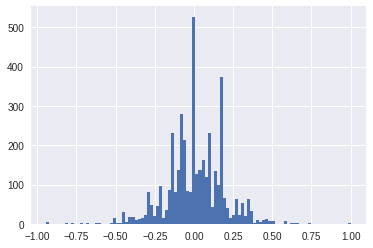

In [11]:
data_train = pd.concat([train_nonzero, train_zero], ignore_index=True)
data_train.steering.hist(bins=100)

In [0]:
names = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
data_val = pd.read_csv(DATA_VAL_FOLDER + 'driving_log.csv', names=names)
data_test = pd.read_csv(DATA_TEST_FOLDER + 'driving_log.csv', names=names)

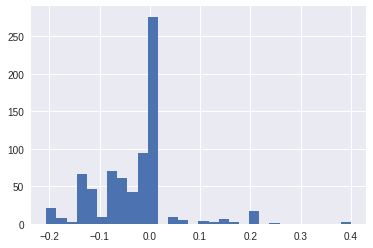

In [38]:
data_val.steering.hist(bins=30)

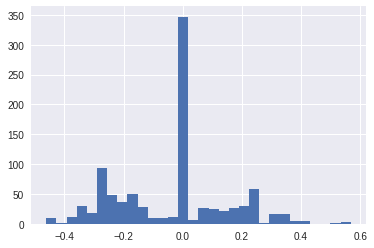

In [13]:
data_test.steering.hist(bins=30)

In [14]:
len(data_train), len(data_val), len(data_test)

(4111, 748, 948)

**Interesting Observations**
- Steering angle varies between -1.0 and 1.0 but its almost always 0 (driving straight). This is not good as then our model would be biased to driving straight.
- The car was driven at it's maximum speed most of the time.
- The throttle was barely adjusted while driving and same with the breaking which was rarely applied.
- Steering data is biased towards turning left.

### 3. Data augmentation and generation 


**Data Augmentation**

*To increase the amount of data by making changes to the original data and making copies. Data augmentation is a way to get around a lack of data. Also helps to prevent over-fitting*


To train a model with such small data, I have to use augmentation. First idea is to flip images horizontally and negate the steering angle.Also brightness and translation augmentations are performed.



image_transformation:to cut useless part of images. This preprocessing is used for train and prediction code aswell



In [0]:
input_shape = (64, 64, 3)

In [0]:
def _get_img_and_steering_from_row(row, folder):
    imgpath = row.center.values[0]
    imgpath = imgpath[imgpath.find('IMG'):]
    img = cv2.imread(folder + imgpath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    steering = row.steering.values[0]
    return img, steering


def _get_img_and_steering_from_iloc_row(row, folder):
    imgpath = row.center
    imgpath = imgpath[imgpath.find('IMG'):]
    img = cv2.imread(folder + imgpath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    steering = row.steering
    return img, steering


def _get_flipped_image(img, y):
    img = cv2.flip(img, 1)
    return img, -y


def _get_brightnessed_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    random_bright = .25 + np.random.uniform()
    img[:,:,2] = img[:,:,2] * random_bright
    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    return img


def _get_translated_image(img, y, trans_range):
    rows, cols, _ = img.shape
    tr_x = trans_range * np.random.uniform() - trans_range/2
    y = y + tr_x/trans_range * 2 *.4
    tr_y = 10 * np.random.uniform() - 10/2
    Trans_M = np.float32([[1,0, tr_x], [0,1, tr_y]])
    img = cv2.warpAffine(img, Trans_M, (cols, rows))
    return img, y


def image_augmentation(img, y):
    if np.random.uniform() < 0.5:
        img, y = _get_flipped_image(img, y)
    img = _get_brightnessed_image(img)
    img, y = _get_translated_image(img, y, 100)
    return img, y


def image_transformation(img):
    img = img[60:-20,:,:]
    img = cv2.resize(img, (input_shape[1], input_shape[0]), interpolation=cv2.INTER_AREA)
    return img

(-0.5, 63.5, 63.5, -0.5)

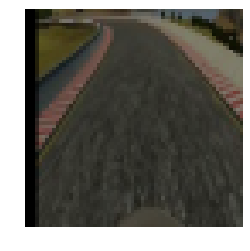

In [18]:
row = data_train.sample()
img, steering = _get_img_and_steering_from_row(row, DATA_TRAIN_FOLDER)
img, steering = image_augmentation(img, steering)
img = image_transformation(img)
plt.imshow(img)
plt.axis('off')

There are 3 generators: 
- train
- for validation 
- for test sets. 

Train generator has to make random data.Validation and test generators sequentially go through the data to ensure repeatability and consistency of evaluations. Here is how all of them loos like:

In [0]:
def train_data_generator(batch_size):
    while True:
        X = np.zeros((batch_size, *input_shape), dtype=np.float32)
        y = np.zeros((batch_size,), dtype=np.float32)
        for idx in range(batch_size):
            row = data_train.sample()
            img, steering = _get_img_and_steering_from_row(row, DATA_TRAIN_FOLDER)
            img, steering = image_augmentation(img, steering)
            img = image_transformation(img)
            X[idx], y[idx] = img, steering
        yield X, y

In [0]:
def val_data_generator(batch_size):
    seq_idx = 0
    while True:
        X = np.zeros((batch_size, *input_shape), dtype=np.float32)
        y = np.zeros((batch_size,), dtype=np.float32)
        for idx in range(batch_size):
            row = data_val.iloc[seq_idx]
            img, steering = _get_img_and_steering_from_iloc_row(row, DATA_VAL_FOLDER)
            img = image_transformation(img)
            X[idx], y[idx] = img, steering
            
            seq_idx += 1
            if seq_idx == len(data_val):
                seq_idx = 0
        yield X, y

In [0]:
def test_data_generator(batch_size):
    seq_idx = 0
    while True:
        X = np.zeros((batch_size, *input_shape), dtype=np.float32)
        y = np.zeros((batch_size,), dtype=np.float32)
        for idx in range(batch_size):
            row = data_test.iloc[seq_idx]
            img, steering = _get_img_and_steering_from_iloc_row(row, DATA_TEST_FOLDER)
            img = image_transformation(img)
            X[idx], y[idx] = img, steering
            
            seq_idx += 1
            if seq_idx == len(data_test):
                seq_idx = 0
        yield X, y

### 4. Building the Model




The model will take in an image (either from the left, center, or right camera) and output a single number between -1 and 1 representing the steering angle.  Keras is used  to implement the model. Keras is a deep learning library that runs on Tensorflow or Theano and is best for fast prototyping. 

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, ELU, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


**Code as per Nvidia's model**

```
def get_model():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1., input_shape=input_shape))
    model.add(Convolution2D(3,1,1,  border_mode='valid', name='conv0', init='he_normal'))
    model.add(Convolution2D(32,3,3, border_mode='valid', name='conv1', init='he_normal'))
    model.add(ELU())
    model.add(Convolution2D(32,3,3, border_mode='valid', name='conv2', init='he_normal'))
    model.add(ELU())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Convolution2D(64,3,3, border_mode='valid', name='conv3', init='he_normal'))
    model.add(ELU())
    model.add(Convolution2D(64,3,3, border_mode='valid', name='conv4', init='he_normal'))
    model.add(ELU())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Convolution2D(128,3,3, border_mode='valid', name='conv5', init='he_normal'))
    model.add(ELU())
    model.add(Convolution2D(128,3,3, border_mode='valid', name='conv6', init='he_normal'))
    model.add(ELU())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(512,name='hidden1', init='he_normal'))
    model.add(ELU())
    model.add(Dropout(0.5))
    model.add(Dense(64,name='hidden2', init='he_normal'))
    model.add(ELU())
    model.add(Dropout(0.5))
    model.add(Dense(16,name='hidden3',init='he_normal'))
    model.add(ELU())
    model.add(Dropout(0.5))
    model.add(Dense(1, name='output', init='he_normal'))
    model.compile(optimizer="adam", loss="mse")
    return model
```



In [0]:
def get_model():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1., input_shape=input_shape))
    model.add(Convolution2D(3,1,1,  border_mode='valid', name='conv0', init='he_normal'))
    model.add(Convolution2D(32,3,1, border_mode='valid', name='conv1.0', init='he_normal'))
    model.add(Convolution2D(32,1,3, border_mode='valid', name='conv1.1', init='he_normal'))
    model.add(Convolution2D(32,1,1, border_mode='valid', name='conv1.2', init='he_normal'))
    model.add(ELU())
    model.add(Convolution2D(32,3,1, border_mode='valid', name='conv2.0', init='he_normal'))
    model.add(Convolution2D(32,1,3, border_mode='valid', name='conv2.1', init='he_normal'))
    model.add(Convolution2D(32,1,1, border_mode='valid', name='conv2.2', init='he_normal'))
    model.add(ELU())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))  
    model.add(Convolution2D(64,3,1, border_mode='valid', name='conv3.0', init='he_normal'))
    model.add(Convolution2D(64,1,3, border_mode='valid', name='conv3.1', init='he_normal'))
    model.add(Convolution2D(64,1,1, border_mode='valid', name='conv3.2', init='he_normal'))
    model.add(ELU())
    model.add(Convolution2D(64,3,1, border_mode='valid', name='conv4.0', init='he_normal'))
    model.add(Convolution2D(64,1,3, border_mode='valid', name='conv4.1', init='he_normal'))
    model.add(Convolution2D(64,1,1, border_mode='valid', name='conv4.2', init='he_normal'))
    model.add(ELU())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Convolution2D(128,3,1, border_mode='valid', name='conv5.0', init='he_normal'))
    model.add(Convolution2D(128,1,3, border_mode='valid', name='conv5.1', init='he_normal'))
    model.add(Convolution2D(128,1,1, border_mode='valid', name='conv5.2', init='he_normal'))
    model.add(ELU())
    model.add(Convolution2D(128,3,1, border_mode='valid', name='conv6.0', init='he_normal'))
    model.add(Convolution2D(128,1,3, border_mode='valid', name='conv6.1', init='he_normal'))
    model.add(Convolution2D(128,1,1, border_mode='valid', name='conv6.2', init='he_normal'))
    model.add(ELU())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(512,name='hidden1', init='he_normal'))
    model.add(ELU())
    model.add(Dropout(0.5))
    model.add(Dense(32,name='hidden2', init='he_normal'))
    model.add(ELU())
    model.add(Dropout(0.5))
    model.add(Dense(1, name='output', init='he_normal'))
    model.compile(optimizer="adam", loss="mse")
    return model

In [34]:
model= get_model()
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (1, 1), name="conv0", padding="valid", kernel_initializer="he_normal")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 1), name="conv1.0", padding="valid", kernel_initializer="he_normal")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 3), name="conv1.1", padding="valid", kernel_initializer="he_normal")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), name="conv1.2", padding="valid", kernel_initializer="he_normal")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_6 (Lambda)            (None, 64, 64, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 3)         12        
_________________________________________________________________
conv1.0 (Conv2D)             (None, 62, 64, 32)        320       
_________________________________________________________________
conv1.1 (Conv2D)             (None, 62, 62, 32)        3104      
_________________________________________________________________
conv1.2 (Conv2D)             (None, 62, 62, 32)        1056      
_________________________________________________________________
elu_40 (ELU)                 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2.0 (Conv2D)             (None, 60, 62, 32)        3104      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, name="output", kernel_initializer="he_normal")`


### 5. Training the Model

With baches of size 50 trained the model for 10 epoch with 20k examples in each. Validation data was used to evaluate model performance.  [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) is used to callback of keras to save best weights according to validation data evaluation.

Validate on custom data from 1st track.Test on custom data from 2nd track

In [0]:
model = get_model()
model.fit_generator(
    train_data_generator(50),
    samples_per_epoch=20000,
    nb_epoch=10,
    validation_data=val_data_generator(250),
    nb_val_samples=750,
    callbacks=[ModelCheckpoint(filepath="best_validation.h5", verbose=1, save_best_only=True)]
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (1, 1), name="conv0", padding="valid", kernel_initializer="he_normal")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 1), name="conv1.0", padding="valid", kernel_initializer="he_normal")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 3), name="conv1.1", padding="valid", kernel_initializer="he_normal")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), name="conv1.2", padding="valid", kernel_initializer="he_normal")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to

Epoch 1/10
 1142/20000 [>.............................] - ETA: 1:08:07 - loss: 4.0651

 2453/20000 [==>...........................] - ETA: 1:03:23 - loss: 2.3713

 3772/20000 [====>.........................] - ETA: 58:55 - loss: 1.7208

 5227/20000 [======>.......................] - ETA: 53:39 - loss: 1.3140

 6614/20000 [========>.....................] - ETA: 48:31 - loss: 1.0649

 7993/20000 [==========>...................] - ETA: 43:27 - loss: 0.8899

 9585/20000 [=============>................] - ETA: 37:39 - loss: 0.7464

10976/20000 [===============>..............] - ETA: 32:29 - loss: 0.6547

12340/20000 [=================>............] - ETA: 27:36 - loss: 0.5848

13793/20000 [===================>..........] - ETA: 22:20 - loss: 0.5255

15427/20000 [======================>.......] - ETA: 16:26 - loss: 0.4722

16766/20000 [========================>.....] - ETA: 11:37 - loss: 0.4363

18215/20000 [==========================>...] - ETA: 6:25 - loss: 0.4035

19742/20000 [============================>.] - ETA: 55s - loss: 6833.7620

20000/20000 [==============================] - 4603s 230ms/step - loss: 157821496.8404 - val_loss: 0.1866

Epoch 00001: val_loss improved from inf to 0.18663, saving model to best_validation.h5
Epoch 2/10
  282/20000 [..............................] - ETA: 1:06:54 - loss: 0.2538

 1605/20000 [=>............................] - ETA: 1:06:40 - loss: 2.7957

 2895/20000 [===>..........................] - ETA: 1:00:58 - loss: 1.6133

 4281/20000 [=====>........................] - ETA: 56:38 - loss: 215.3380

 5649/20000 [=======>......................] - ETA: 51:25 - loss: 163.2200

 6918/20000 [=========>....................] - ETA: 46:33 - loss: 133.3015

 8214/20000 [===========>..................] - ETA: 41:48 - loss: 130.1063

 9582/20000 [=============>................] - ETA: 36:54 - loss: 37405.0223

10930/20000 [===============>..............] - ETA: 32:05 - loss: 32791.8661

12281/20000 [=================>............] - ETA: 27:15 - loss: 29184.5342

13596/20000 [===================>..........] - ETA: 22:35 - loss: 32677.5244

14917/20000 [=====================>........] - ETA: 17:55 - loss: 563937.8775

16305/20000 [=======================>......] - ETA: 13:01 - loss: 515931.4060

17872/20000 [=========================>....] - ETA: 7:29 - loss: 470695.0459

18476/20000 [==========================>...] - ETA: 5:22 - loss: 455307.5324

### 6. Evaluation

After model was trained,  3 evaluation metrics are printed:

- latest epoch weights on val data.
- best weights on val data.
- final evaluation on test data.





In [0]:
print('Latest', model.evaluate_generator(val_data_generator(250), 750))
model.load_weights('best_validation.h5')
print('Best', model.evaluate_generator(val_data_generator(250), 750))

In [0]:
model.evaluate_generator(test_data_generator(50), 950)

In [0]:
def get_samples(log, folder):
    for _ in range(10):
        row = log.sample()
        imgpath = row.center.values[0]
        imgpath = imgpath[imgpath.find('IMG'):]
        img = cv2.imread(folder + imgpath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = image_transformation(img)
        print(row.steering.values[0], model.predict(np.expand_dims(img, axis=0))[0])

Manual checks of how the model predicts the output on validation data:

In [0]:
get_samples(data_val, DATA_VAL_FOLDER)

Manual checks of how the model predicts the output on test data:

In [0]:
get_samples(data_test, DATA_TEST_FOLDER)

### 7. Save and use


In [0]:
import json
with open('model.json', 'w') as f:
    f.write(model.to_json())
model.save_weights('model.h5')

## References:
[End to End Learning for Self-Driving Cars
Mariusz Bojarski et-al](https://arxiv.org/abs/1604.07316)
[Medium-blog on self driving cars](https://medium.com/decode-ways/hacktorial-self-driving-car-df81dde2bc25)

[GIthub-Navoshta:end-to-end-deep-learning](https://navoshta.com/end-to-end-deep-learning/)

[CS231n](http://cs231n.github.io/convolutional-networks/#conv)

[How_to_simulate_a_self_driving_car](https://github.com/llSourcell/How_to_simulate_a_self_driving_car/blob/master/self-driving-car.ipynb)

[Medium-Hacktorial #1: Building a Self-Driving Car with Deep Learning](https://medium.com/decode-ways/hacktorial-self-driving-car-df81dde2bc25)

[Quora-what is a "dense" and a "dropout" layer](https://www.quora.com/In-Keras-what-is-a-dense-and-a-dropout-layer)

[Siraj Raval-How to Simulate a Self-Driving Car](https://www.youtube.com/watch?v=EaY5QiZwSP4)